<a href="https://colab.research.google.com/github/sarvesh2000/ezfinup/blob/vaishnav/Algo_Trading_For_Dynamic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import pandas_datareader as pdr

In [ ]:
def display(start,end,symbol):
    df = pdr.get_data_yahoo(symbol, start,end)
    if symbol.upper() == 'AMZN':
        df.to_csv('AMZN.csv')
    elif symbol.upper() == 'TSLA':
        df.to_csv('TSLA.csv')
    elif symbol.upper() == 'GOOG':
        df.to_csv('GOOG.csv')
    elif symbol.upper() == 'AAPL':
        df.to_csv('AAPL.csv')
    elif symbol.upper() == 'IDEA.NS':
        df.to_csv('IDEANS.csv')

    df = get_data(symbol,start,end) 

In [ ]:
def get_data(symbol,start,end):
    
    #load the data
    if symbol.upper() == 'AMZN':
        df = pd.read_csv("AMZN.csv")
    elif symbol.upper() == 'TSLA':
        df = pd.read_csv("TSLA.csv")
    elif symbol.upper() == 'GOOG':
        df = pd.read_csv("GOOG.csv")  
    elif symbol.upper() == 'AAPL':
        df = pd.read_csv("AAPL.csv") 
    elif symbol.upper() == 'IDEA.NS':
        df = pd.read_csv("IDEANS.csv")
    return df

In [ ]:
start=input()
end=input()
symbol=input()

display(start,end,symbol)

14-01-2020
14-01-2021
AMZN


In [ ]:
stock = get_data(symbol,start,end)
stock

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-13,1898.000000,1880.800049,1891.310059,1891.300049,2780800,1891.300049
1,2020-01-14,1887.109985,1858.550049,1885.880005,1869.439941,3440900,1869.439941
2,2020-01-15,1878.859985,1855.089966,1872.250000,1862.020020,2896600,1862.020020
3,2020-01-16,1885.589966,1866.020020,1882.989990,1877.939941,2659500,1877.939941
4,2020-01-17,1886.640015,1857.250000,1885.890015,1864.719971,3997300,1864.719971
...,...,...,...,...,...,...,...
249,2021-01-07,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912
250,2021-01-08,3190.639893,3142.199951,3180.000000,3182.699951,3534300,3182.699951
251,2021-01-11,3156.379883,3110.000000,3148.010010,3114.209961,3683400,3114.209961
252,2021-01-12,3142.139893,3086.000000,3120.000000,3120.830078,3514600,3120.830078


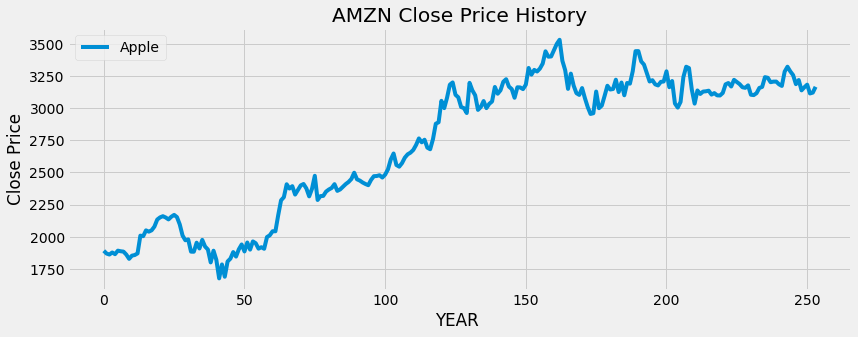

In [ ]:


#Visualize the Data
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple')
plt.title(symbol+' Close Price History')
plt.xlabel('YEAR ')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
Sma30=pd.DataFrame()
Sma30['Prev Close Price']=stock['Close'].rolling(window=10).mean()

#Creating Simple Moving Average with 100-day Window
Sma100=pd.DataFrame()
Sma100['Prev Close Price']=stock['Close'].rolling(window=50).mean()

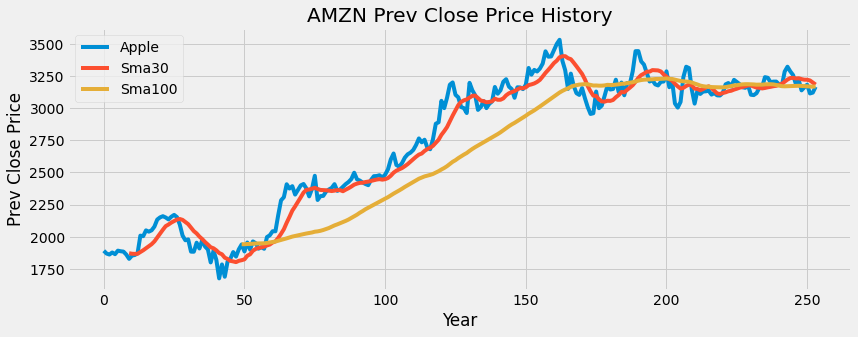

In [ ]:
#Visualize to compare
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple')
plt.plot(Sma30['Prev Close Price'],label = 'Sma30')
plt.plot(Sma100['Prev Close Price'],label = 'Sma100')
plt.title(symbol+' Prev Close Price History')
plt.xlabel('Year')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data=pd.DataFrame()
data['stock']=stock['Close']
data['Sma30']=Sma30['Prev Close Price']
data['Sma100']=Sma100['Prev Close Price']

In [ ]:
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1


  for i in range(len(data)):
    if data['Sma30'][i]>data['Sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['Sma30'][i]<data['Sma100'][i]:
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)


  return(sigPriceBuy,sigPriceSell)

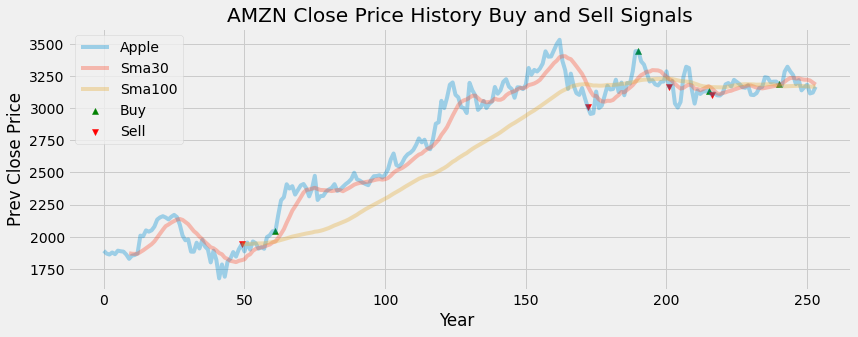

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

#Visualize the Data
plt.figure(figsize=(12.5,4.5))
plt.plot(stock['Close'],label = 'Apple',alpha=0.35)
plt.plot(Sma30['Prev Close Price'],label = 'Sma30' ,alpha=0.35)
plt.plot(Sma100['Prev Close Price'],label = 'Sma100' ,alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title(symbol+' Close Price History Buy and Sell Signals')
plt.xlabel('Year ')
plt.ylabel('Prev Close Price')
plt.legend(loc='upper left')
plt.show()